과제: 파이썬 딥러닝 텐서플로 ch4.1~3 필사

마감: 5월 27일 월요일 18:30

142p~181p 필사하여 링크를 올려주세요.


# (4) 합성곱 신경망(CNN)
## 4.1 합성곱 신경망
이미지 분류, 객체 탐지, 스타일 전이 등


### 1-1 이미지 표현
이미지 또는 영상을 컴퓨터가 이해할 수 있게 숫자로 표현  
RGB 0~255로 구성된 3장의 이미지를 겹쳐서 하나의 이미지로 표현  

### 1-2 합성곱(Convolution)
합성곱 연산은 입력 이미지에 대하여 일반적으로 정방형 크기를 가지는 커널(kernel)을 사용하여 입력 이미지에 대한 특성을 추출  
* 합성곱 연산을 통해서 추출된 이미지를 특성맵(feature map)이라고 부른다  

### 1-4 스트라이드(stride)
커널은 좌측 상단으로부터 입력 이미지를 기준으로 우측으로 이동하면서 합성곱 연산을 계속 수행하고 특성맵에 결과를 채워나간다   
* 이때 이동하는 간격을 스트라이드로 정의하며, 주로 1 또는 2로 설정한다  

### 1-6 특성맵(feature map) 사이즈
패딩과 스트라이드를 적용하고 입력 데이터와 필터의 크기가 주어졌을 때 출력 데이터의 크기를 구하는 식은 아래와 같다  

### 1-7 풀링(pooling)

풀링 레이어는 추출된 특성맵에 대해 다운 샘플링하여 이미지의 크기를 축소하는 레이어로 연산량을 감소하고 과대적합을 방지할 수 있다
* 최대 풀링(max pooling)
* 평균 풀링(average pooling)

## 02. 간단한 모델 생성
### 2-1 데이터 로드 및 전처리

In [ ]:
# tensorflow 모듈 import
import tensorflow as tf

# mnist 손글씨 이미지 데이터 로드
mnist = tf.keras.datasets.mnist
(x_train, y_train),(x_valid, y_valid) = mnist.load_data()

print(x_train.shape, y_train.shape)
print(x_valid.shape, y_valid.shape)

11490434/11490434 [==============================] - 0s 0us/step
(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


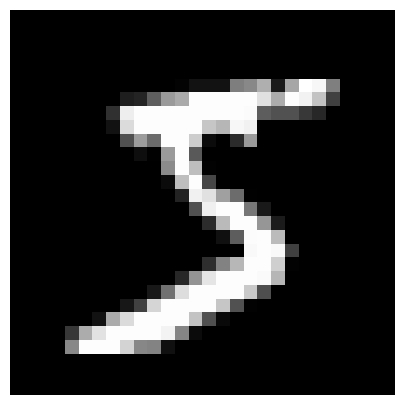

In [ ]:
# 샘플 이미지 출력
import matplotlib.pylab as plt

def plot_image(data, idx):
  plt.figure(figsize=(5,5))
  plt.imshow(data[idx], cmap='gray')
  plt.axis('off')
  plt.show()

plot_image(x_train, 0)

In [ ]:
print(x_train.min(), x_train.max())
print(x_valid.min(), x_valid.max())

0 255
0 255


In [ ]:
# 정규화 (Normalization)
x_train = x_train / 255.0
x_valid = x_valid / 255.0

print(x_train.min(), x_train.max())
print(x_valid.min(), x_valid.max())

0.0 1.0
0.0 1.0


* CNN 모델에 주입하기 위해서 색상을 나타내는 채널을 추가해준다
* 다음은 텐서 배열에 축을 직접 추가하는 방식으로 (60000, 28, 28) 형태의 텐서가 (60000, 28, 28, 1) 형태로 변환된다
* [　] 안에서 채널을 추가하고자 하는 위치에 tf.newaxis를 작성하면 된다

In [ ]:
# 채널 추가
print(x_train.shape, x_valid.shape)

x_train_in = x_train [..., tf.newaxis]
x_valid_in = x_valid [..., tf.newaxis]

print(x_train_in.shape, x_valid_in.shape)

(60000, 28, 28) (10000, 28, 28)
(60000, 28, 28, 1) (10000, 28, 28, 1)


### 2-2 Sequential API로 모델 생성 및 학습
합성곱 레이어 1개, 풀링 레이어 1개를 적용하는 간단한 모델 만들기

In [ ]:
# Sequential API를 사용해 샘플 모델 생성
model = tf.keras.Sequential([
    # Convolution 적용(32 filters)
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1), name='conv'),
    # Max pooling 적용
    tf.keras.layers.MaxPooling2D((2,2), name='pool'),
    # Classifier 출력층
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(10, activation='softmax')
])

In [ ]:
# 모델 컴파일
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# 모델 훈련
history = model.fit(x_train_in, y_train,
                    validation_data=(x_valid_in, y_valid),
                    epochs=10)

Epoch 1/10
1875/1875 [==============================] - 33s 17ms/step - loss: 0.2029 - accuracy: 0.9417 - val_loss: 0.0863 - val_accuracy: 0.9740
Epoch 2/10
1875/1875 [==============================] - 33s 18ms/step - loss: 0.0779 - accuracy: 0.9773 - val_loss: 0.0656 - val_accuracy: 0.9794
Epoch 3/10
1875/1875 [==============================] - 37s 20ms/step - loss: 0.0602 - accuracy: 0.9820 - val_loss: 0.0596 - val_accuracy: 0.9801
Epoch 4/10
1875/1875 [==============================] - 32s 17ms/step - loss: 0.0495 - accuracy: 0.9851 - val_loss: 0.0531 - val_accuracy: 0.9826
Epoch 5/10
1875/1875 [==============================] - 32s 17ms/step - loss: 0.0415 - accuracy: 0.9876 - val_loss: 0.0619 - val_accuracy: 0.9791
Epoch 6/10
1875/1875 [==============================] - 31s 16ms/step - loss: 0.0359 - accuracy: 0.9890 - val_loss: 0.0524 - val_accuracy: 0.9834
Epoch 7/10
1875/1875 [==============================] - 37s 20ms/step - loss: 0.0303 - accuracy: 0.9908 - val_loss: 0.0549 -

In [ ]:
model.evaluate(x_valid_in, y_valid)

313/313 [==============================] - 5s 14ms/step - loss: 0.0683 - accuracy: 0.9819


[0.0682867094874382, 0.9818999767303467]

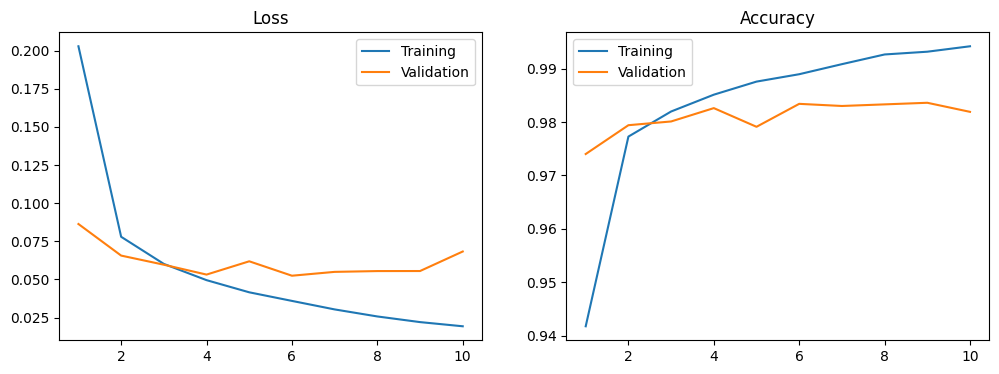

In [ ]:
def plot_loss_acc(history, epoch):

  loss, val_loss = history.history['loss'], history.history['val_loss']
  acc, val_acc = history.history['accuracy'], history.history['val_accuracy']

  fig, axes = plt.subplots(1,2,figsize=(12,4))

  axes[0].plot(range(1, epoch+1), loss, label='Training')
  axes[0].plot(range(1, epoch+1), val_loss, label='Validation')
  axes[0].legend(loc='best')
  axes[0].set_title('Loss')

  axes[1].plot(range(1, epoch+1), acc, label='Training')
  axes[1].plot(range(1, epoch+1), val_acc, label='Validation')
  axes[1].legend(loc='best')
  axes[1].set_title('Accuracy')

  plt.show()

plot_loss_acc(history, 10)

### 2-3 모델 구조 파악

In [ ]:
# 모델 구조
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv (Conv2D)               (None, 26, 26, 32)        320       
                                                                 
 pool (MaxPooling2D)         (None, 13, 13, 32)        0         
                                                                 
 flatten (Flatten)           (None, 5408)              0         
                                                                 
 dense (Dense)               (None, 10)                54090     
                                                                 
Total params: 54410 (212.54 KB)
Trainable params: 54410 (212.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# 입력 텐서 형태
model.input

<KerasTensor: shape=(None, 28, 28, 1) dtype=float32 (created by layer 'conv_input')>

In [ ]:
# 출력 텐서 형태
model.output

<KerasTensor: shape=(None, 10) dtype=float32 (created by layer 'dense')>

In [ ]:
# 레이어
model.layers

In [ ]:
# 첫번째 레이어 선택
model.layers[0]

In [ ]:
# 첫번째 레이어 입력
model.layers[0].input

<KerasTensor: shape=(None, 28, 28, 1) dtype=float32 (created by layer 'conv_input')>

In [ ]:
# 첫번째 레이어 출력
model.layers[0].output

<KerasTensor: shape=(None, 26, 26, 32) dtype=float32 (created by layer 'conv')>

In [ ]:
# 첫번째 레이어 가중치
model.layers[0].weights

[<tf.Variable 'conv/kernel:0' shape=(3, 3, 1, 32) dtype=float32, numpy=
 array([[[[-7.56753981e-01,  6.17149062e-02, -1.46620572e-01,
            4.74164248e-01, -1.73874646e-01,  2.65136391e-01,
            2.20846280e-01,  2.43072450e-01, -3.55740696e-01,
            1.09805413e-01,  1.67338669e-01,  6.61744893e-01,
            6.14267811e-02, -3.32764626e-01,  1.91990256e-01,
           -5.23577571e-01,  3.14643115e-01, -9.88286510e-02,
            2.51846611e-01,  1.07397929e-01, -9.51041505e-02,
           -1.70494437e-01,  2.94492602e-01, -1.32436621e+00,
           -4.97092932e-01,  8.91831443e-02, -2.89125182e-02,
            2.83617437e-01, -6.84742808e-01, -2.62434687e-03,
            3.75410140e-01, -1.72644341e+00]],
 
         [[-2.92547077e-01,  2.92862177e-01, -4.77510303e-01,
            4.13766384e-01,  1.29553244e-01, -8.35497864e-03,
            3.35586339e-01, -6.73622650e-04, -6.32474124e-02,
            1.79773584e-01,  5.78714430e-01, -7.02978253e-01,
           

In [ ]:
# 첫번째 레이어 커널 가중치
model.layers[0].kernel

<tf.Variable 'conv/kernel:0' shape=(3, 3, 1, 32) dtype=float32, numpy=
array([[[[-7.56753981e-01,  6.17149062e-02, -1.46620572e-01,
           4.74164248e-01, -1.73874646e-01,  2.65136391e-01,
           2.20846280e-01,  2.43072450e-01, -3.55740696e-01,
           1.09805413e-01,  1.67338669e-01,  6.61744893e-01,
           6.14267811e-02, -3.32764626e-01,  1.91990256e-01,
          -5.23577571e-01,  3.14643115e-01, -9.88286510e-02,
           2.51846611e-01,  1.07397929e-01, -9.51041505e-02,
          -1.70494437e-01,  2.94492602e-01, -1.32436621e+00,
          -4.97092932e-01,  8.91831443e-02, -2.89125182e-02,
           2.83617437e-01, -6.84742808e-01, -2.62434687e-03,
           3.75410140e-01, -1.72644341e+00]],

        [[-2.92547077e-01,  2.92862177e-01, -4.77510303e-01,
           4.13766384e-01,  1.29553244e-01, -8.35497864e-03,
           3.35586339e-01, -6.73622650e-04, -6.32474124e-02,
           1.79773584e-01,  5.78714430e-01, -7.02978253e-01,
           3.19445789e-01, -

In [ ]:
# 첫번째 레이어 bias 가중치
model.layers[0].bias

<tf.Variable 'conv/bias:0' shape=(32,) dtype=float32, numpy=
array([-0.00795696, -0.14248481, -0.00725425, -0.01203848, -0.20151044,
       -0.10360166, -0.06687807, -0.25441867, -0.17187044, -0.03968296,
       -0.0035636 , -0.00786101, -0.26255253, -0.19137159, -0.16434695,
       -0.17921366,  0.00765646, -0.24350004, -0.13547884, -0.16981012,
        0.04364689, -0.24412951, -0.36258155,  0.0805348 , -0.18116678,
       -0.20067692, -0.008758  , -0.24263462, -0.10552896, -0.10278448,
       -0.31987476,  0.1602466 ], dtype=float32)>

In [ ]:
# 레이어 이름 사용하여 레이어 선택
model.get_layer('conv')

In [ ]:
# 샘플 이미지의 레이어별 출력을 리스트에 추가(첫번째, 두번째 레이어)
activator = tf.keras.Model(inputs=model.input,
                           outputs=[layer.output for layer in model.layers[:2]])
activations = activator.predict(x_train_in[0][tf.newaxis, ...])

len(activations)

1/1 [==============================] - 0s 167ms/step


2

In [ ]:
# 첫번째 레이어(conv) 출력층
conv_activation = activations[0]
conv_activation.shape

(1, 26, 26, 32)

* 첫번째 레이어에서 출력되는 특성맵 이미지를 32개 커널별로 구분하여 시각화

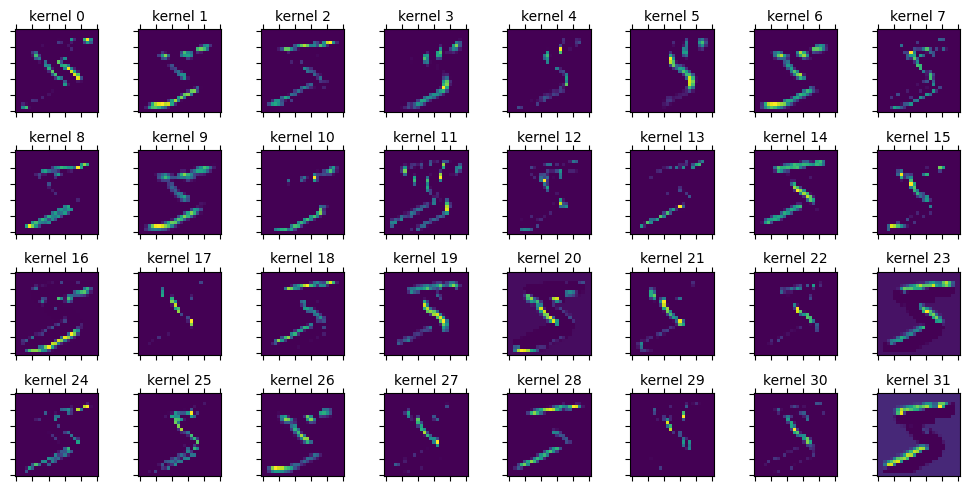

In [ ]:
# Convolution 시각화
fig, axes = plt.subplots(4,8)
fig.set_size_inches(10,5)

for i in range(32):
  axes[i//8, i%8].matshow(conv_activation[0,:,:,i], cmap='viridis')
  axes[i//8, i%8].set_title('kernel %s'%str(i), fontsize=10)
  plt.setp(axes[i//8, i%8].get_xticklabels(), visible=False)
  plt.setp(axes[i//8, i%8].get_yticklabels(), visible=False)

plt.tight_layout()
plt.show()

In [ ]:
# 두번째 레이어(pool) 출력층
pooling_activation = activations[1]
pooling_activation.shape

(1, 13, 13, 32)

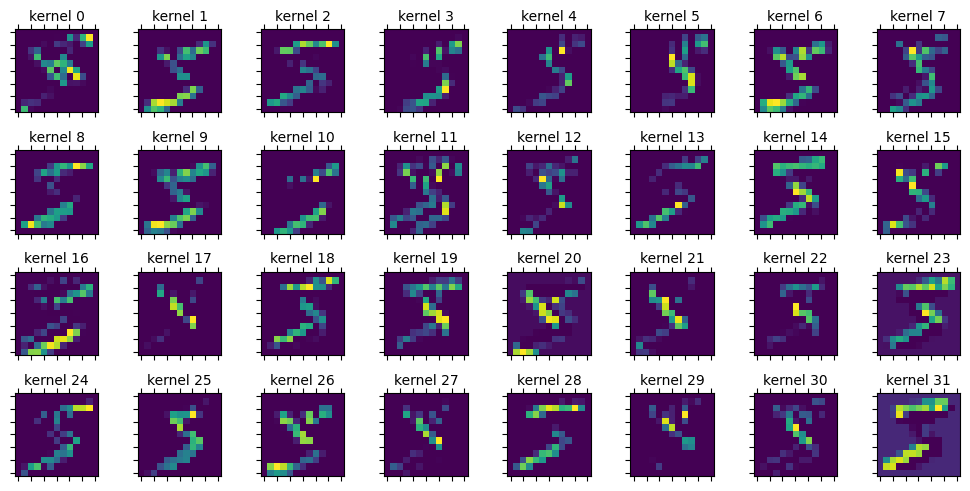

In [ ]:
# 시각화
fig, axes = plt.subplots(4,8)
fig.set_size_inches(10,5)

for i in range(32):
  axes[i//8, i%8].matshow(pooling_activation[0,:,:,i], cmap='viridis')
  axes[i//8, i%8].set_title('kernel %s'%str(i), fontsize=10)
  plt.setp(axes[i//8, i%8].get_xticklabels(), visible=False)
  plt.setp(axes[i//8, i%8].get_yticklabels(), visible=False)

plt.tight_layout()
plt.show()

* 앞서 Conv2D 출력 이미지에 비하여 화소 크기가 굵어진 것을 볼 수 있다
* 최대 풀링은 인근 픽셀들을 모아서 최대값으로 고정하기 때문에 픽셀 수는 줄이면서 특징을 더욱 강하게 드러낼 수 있다

## 03. 복잡한 모델 생성
Functional API를 사용하면 각 레이어를 기준으로 입력이 2개 이상이거나 출력이 2개 이상인 모델을 만들 수 있다

### 3-1 데이터셋 준비


In [ ]:
# tensorflow 모듈 import
import tensorflow as tf
import numpy as np

# mnist 손글씨 이미지 데이터 로드
mnist = tf.keras.datasets.mnist
(x_train, y_train),(x_valid, y_valid) = mnist.load_data()

print(x_train.shape, y_train.shape)
print(x_valid.shape, y_valid.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


* 0~9까지 숫자를 맞추는 정답 외에 홀수인지 짝수인지 판단하는 정답 y_odd를 새로 추가하기로 한다

In [ ]:
# 새로운 출력 값 배열 생성(홀수:1, 짝수:0)
y_train_odd = []
for y in y_train:
  if y % 2 == 0:
    y_train_odd.append(0)
  else:
    y_train_odd.append(1)

y_train_odd = np.array(y_train_odd)
y_train_odd.shape

(60000,)

In [ ]:
print(y_train[:10])
print(y_train_odd[:10])

[5 0 4 1 9 2 1 3 1 4]
[1 0 0 1 1 0 1 1 1 0]


In [ ]:
# Validation 데이터셋 처리
y_valid_odd = []
for y in y_valid:
  if y % 2 == 0:
    y_valid_odd.append(0)
  else:
    y_valid_odd.append(1)

y_valid_odd = np.array(y_valid_odd)
y_valid_odd.shape

(10000,)

* 색상이 하나인 모노 컬러 이미지이므로 새로운 축을 추가하고 채널 개수를 1개로 지정한다
* expand_dims(원본 배열, 축 인덱스) 함수를 사용하면 된다. 인덱스 -1로 지정했기 때문에 새로운 축이 맨 끝에 추가된다

In [ ]:
# 정규화
x_train = x_train / 255.0
x_valid = x_valid / 255.0

# 채널 추가
x_train_in = tf.expand_dims(x_train, -1)
x_valid_in = tf.expand_dims(x_valid, -1)

print(x_train_in.shape, x_valid_in.shape)

(60000, 28, 28, 1) (10000, 28, 28, 1)


### 3-2 Functional API로 다중 입력, 다중 출력 레이어 생성

In [ ]:
# Functional API를 사용하여 모델 생성

inputs = tf.keras.layers.Input(shape=(28,28,1))

conv = tf.keras.layers.Conv2D(32,(3,3), activation='relu')(inputs)
pool = tf.keras.layers.MaxPooling2D((2,2))(conv)
flat = tf.keras.layers.Flatten()(pool)

flat_inputs = tf.keras.layers.Flatten()(inputs)
concat = tf.keras.layers.Concatenate()([flat, flat_inputs])
outputs = tf.keras.layers.Dense(10, activation='softmax')(concat)

model = tf.keras.models.Model(inputs=inputs, outputs=outputs)

model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 28, 28, 1)]          0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 26, 26, 32)           320       ['input_1[0][0]']             
                                                                                                  
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)           0         ['conv2d[0][0]']              
 D)                                                                                               
                                                                                                  
 flatten_1 (Flatten)         (None, 5408)                 0         ['max_pooling2d[0][0]'] 

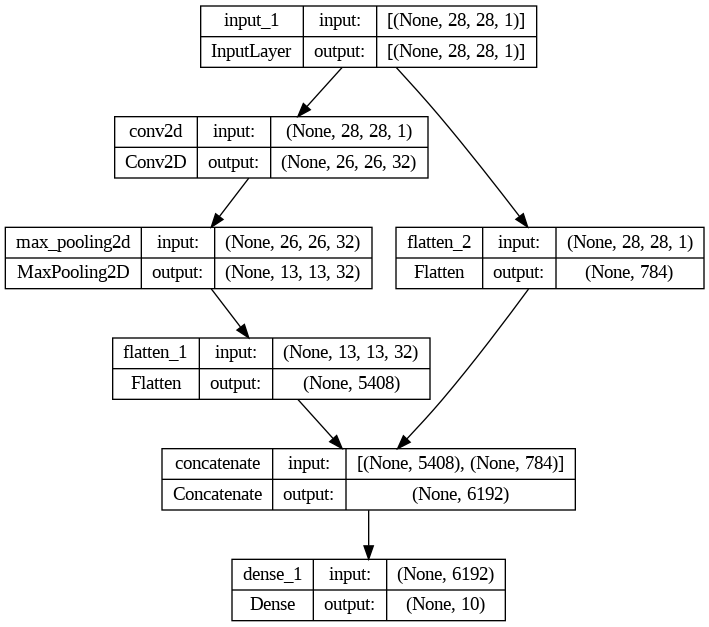

In [ ]:
# 모델 구조 출력 및 이미지 파일로 저장
from tensorflow.keras.utils import plot_model
plot_model(model, show_shapes=True, show_layer_names=True)

In [ ]:
# 모델 컴파일
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# 모델 훈련
history = model.fit(x_train_in, y_train,
                    validation_data=(x_valid_in, y_valid),
                    epochs=10)

# 모델 성능
val_loss, val_acc = model.evaluate(x_valid_in, y_valid)
print(val_loss, val_acc)

Epoch 1/10
1875/1875 [==============================] - 35s 18ms/step - loss: 0.1904 - accuracy: 0.9475 - val_loss: 0.0840 - val_accuracy: 0.9738
Epoch 2/10
1875/1875 [==============================] - 35s 19ms/step - loss: 0.0747 - accuracy: 0.9782 - val_loss: 0.0697 - val_accuracy: 0.9782
Epoch 3/10
1875/1875 [==============================] - 34s 18ms/step - loss: 0.0574 - accuracy: 0.9831 - val_loss: 0.0597 - val_accuracy: 0.9813
Epoch 4/10
1875/1875 [==============================] - 32s 17ms/step - loss: 0.0478 - accuracy: 0.9856 - val_loss: 0.0573 - val_accuracy: 0.9830
Epoch 5/10
1875/1875 [==============================] - 35s 19ms/step - loss: 0.0404 - accuracy: 0.9879 - val_loss: 0.0542 - val_accuracy: 0.9834
Epoch 6/10
1875/1875 [==============================] - 33s 18ms/step - loss: 0.0330 - accuracy: 0.9898 - val_loss: 0.0551 - val_accuracy: 0.9838
Epoch 7/10
1875/1875 [==============================] - 44s 24ms/step - loss: 0.0279 - accuracy: 0.9911 - val_loss: 0.0510 -

### 다중 출력 분류 모델
두가지 서로 다른 분류 문제를 예측하는 다중 출력 모델을 만들어본다 (0~9 맞추기, 홀짝 맞추기)

In [ ]:
# Functional API를 사용하여 모델 생성

inputs = tf.keras.layers.Input(shape=(28,28,1), name='inputs')

conv = tf.keras.layers.Conv2D(32,(3,3), activation='relu', name='conv2d_layer')(inputs)
pool = tf.keras.layers.MaxPooling2D((2,2), name='maxpool_layer')(conv)
flat = tf.keras.layers.Flatten(name='flatten_layer')(pool)

flat_inputs = tf.keras.layers.Flatten()(inputs)
concat = tf.keras.layers.Concatenate()([flat, flat_inputs])
digit_outputs = tf.keras.layers.Dense(10, activation='softmax', name='digit_dense')(concat)

odd_outputs = tf.keras.layers.Dense(1, activation='sigmoid', name='odd_dense')(flat_inputs)

model = tf.keras.models.Model(inputs=inputs, outputs=[digit_outputs,odd_outputs])

model.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 inputs (InputLayer)         [(None, 28, 28, 1)]          0         []                            
                                                                                                  
 conv2d_layer (Conv2D)       (None, 26, 26, 32)           320       ['inputs[0][0]']              
                                                                                                  
 maxpool_layer (MaxPooling2  (None, 13, 13, 32)           0         ['conv2d_layer[0][0]']        
 D)                                                                                               
                                                                                                  
 flatten_layer (Flatten)     (None, 5408)                 0         ['maxpool_layer[0][0]'] 

In [ ]:
# 모델의 입력과 출력을 나타내는 텐서
print(model.input)
print(model.output)

KerasTensor(type_spec=TensorSpec(shape=(None, 28, 28, 1), dtype=tf.float32, name='inputs'), name='inputs', description="created by layer 'inputs'")
[<KerasTensor: shape=(None, 10) dtype=float32 (created by layer 'digit_dense')>, <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'odd_dense')>]


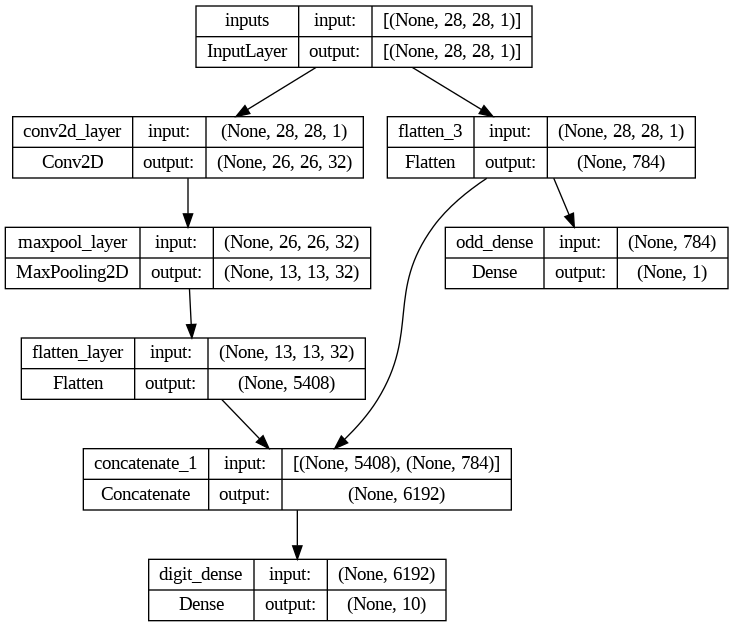

In [ ]:
plot_model(model, show_shapes=True, show_layer_names=True)

* 컴파일할 때 주의할 점은 digit_dense, odd_dense 각 key에 해당하는 레이어에 적용할 손실함수와 가중치를 딕셔너리 형태로 저장해야 한다
* 훈련시킬 때는 fit() 메소드에 출력값을 2개 지정하고, 레이어 이름 속성을 key로 하는 딕셔너리 형태로 각각의 출력에 맞는 정답 배열을 입력해야 한다

In [ ]:
# 모델 컴파일
model.compile(optimizer='adam', loss={'digit_dense':'sparse_categorical_crossentropy','odd_dense':'binary_crossentropy'},
              loss_weights={'digit_dense':1,'odd_dense':0.5}, metrics=['accuracy'])

# 모델 훈련
history = model.fit({'inputs':x_train_in},{'digit_dense':y_train,'odd_dense':y_train_odd},
                    validation_data=({'inputs':x_valid_in}, {'digit_dense':y_valid,'odd_dense':y_valid_odd}),
                    epochs=10)

Epoch 1/10
1875/1875 [==============================] - 57s 30ms/step - loss: 0.3717 - digit_dense_loss: 0.2100 - odd_dense_loss: 0.3235 - digit_dense_accuracy: 0.9403 - odd_dense_accuracy: 0.8648 - val_loss: 0.2293 - val_digit_dense_loss: 0.0915 - val_odd_dense_loss: 0.2755 - val_digit_dense_accuracy: 0.9733 - val_odd_dense_accuracy: 0.8870
Epoch 2/10
1875/1875 [==============================] - 54s 29ms/step - loss: 0.2159 - digit_dense_loss: 0.0800 - odd_dense_loss: 0.2717 - digit_dense_accuracy: 0.9765 - odd_dense_accuracy: 0.8905 - val_loss: 0.2013 - val_digit_dense_loss: 0.0699 - val_odd_dense_loss: 0.2628 - val_digit_dense_accuracy: 0.9775 - val_odd_dense_accuracy: 0.8967
Epoch 3/10
1875/1875 [==============================] - 35s 18ms/step - loss: 0.1932 - digit_dense_loss: 0.0619 - odd_dense_loss: 0.2626 - digit_dense_accuracy: 0.9815 - odd_dense_accuracy: 0.8953 - val_loss: 0.1937 - val_digit_dense_loss: 0.0642 - val_odd_dense_loss: 0.2589 - val_digit_dense_accuracy: 0.9785 -

In [ ]:
# 모델 성능
model.evaluate({'inputs':x_valid_in}, {'digit_dense':y_valid, 'odd_dense':y_valid_odd})

313/313 [==============================] - 2s 6ms/step - loss: 0.1901 - digit_dense_loss: 0.0621 - odd_dense_loss: 0.2561 - digit_dense_accuracy: 0.9827 - odd_dense_accuracy: 0.8999


[0.19011147320270538,
 0.06207074597477913,
 0.25608134269714355,
 0.982699990272522,
 0.8999000191688538]

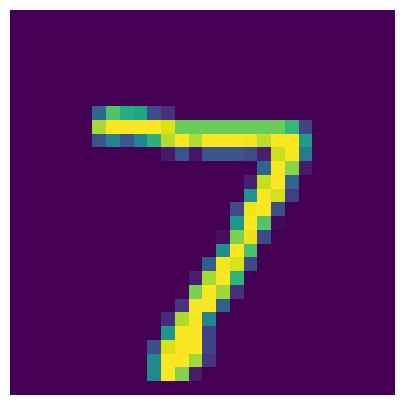

In [ ]:
# 샘플 이미지 출력
def plot_image(data,idx):
  plt.figure(figsize=(5,5))
  plt.imshow(data[idx])
  plt.axis('off')
  plt.show()

plot_image(x_valid,0)

* 첫번째 예측값은 10개 분류 레이블에 대한 확률을 담고 있고, 두번째 예측값은 홀수일 확률을 담고 있다

In [ ]:
digit_preds, odd_preds = model.predict(x_valid_in)
# 숫자 7 이미지에 대한 예측 확률
print(digit_preds[0])
print(odd_preds[0])

313/313 [==============================] - 3s 10ms/step
[1.1539221e-13 1.3078066e-10 1.6394130e-09 3.7069065e-06 1.2765721e-12
 1.7607978e-12 3.5423638e-21 9.9999624e-01 6.2565830e-10 4.2085566e-09]
[0.9995941]


* argmax 함수를 이용하여 예측 확률을 실제 정답 레이블로 변환한다 (첫번째 이미지를 7, 홀수로 잘 예측하고 있다)

In [ ]:
digit_labels = np.argmax(digit_preds, axis=-1)
digit_labels[0:10]

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9])

In [ ]:
odd_labels = (odd_preds > 0.5).astype(np.int64).reshape(1,-1)[0]
odd_labels[0:10]

array([1, 0, 1, 0, 0, 1, 0, 1, 1, 1])

### 3-4 전이 학습(Transfer Learning)
앞 모델의 일부를 가져와서 그대로 사용하고, 최종 출력층만 새롭게 추가하여 모델을 재구성할 수 있다
* 앞 모델에서 Flatten 층까지 해당하는 부분을 따로 추출

In [ ]:
# 앞의 모델에서 flatten_layer 출력을 추출
base_model_output = model.get_layer('flatten_layer').output

# 앞의 출력을 출력으로 하는 모델 정의
base_model = tf.keras.models.Model(inputs=model.input, outputs=base_model_output, name='base')
base_model.summary()

Model: "base"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputs (InputLayer)         [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_layer (Conv2D)       (None, 26, 26, 32)        320       
                                                                 
 maxpool_layer (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 flatten_layer (Flatten)     (None, 5408)              0         
                                                                 
Total params: 320 (1.25 KB)
Trainable params: 320 (1.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


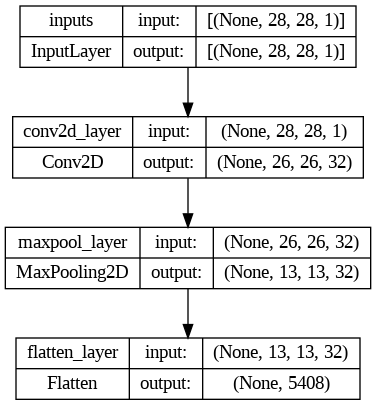

In [ ]:
plot_model(base_model, show_shapes=True, show_layer_names=True)

* base_model에 이어서 최종 분류기 역할을 하는 Dense 레이어를 새롭게 추가해준다

In [ ]:
# Sequential API 적용
digit_model = tf.keras.Sequential([base_model,
                                   tf.keras.layers.Dense(10, activation='softmax')])
digit_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 base (Functional)           (None, 5408)              320       
                                                                 
 dense_2 (Dense)             (None, 10)                54090     
                                                                 
Total params: 54410 (212.54 KB)
Trainable params: 54410 (212.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


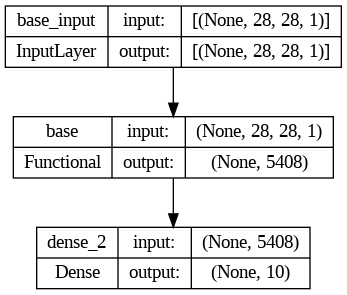

In [ ]:
plot_model(digit_model, show_shapes=True, show_layer_names=True)

In [ ]:
# 모델 컴파일
digit_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# 모델 훈련
history = digit_model.fit(x_train_in, y_train,
                          validation_data=(x_valid_in, y_valid),
                          epochs=10)

Epoch 1/10
1875/1875 [==============================] - 51s 26ms/step - loss: 0.1301 - accuracy: 0.9638 - val_loss: 0.0696 - val_accuracy: 0.9776
Epoch 2/10
1875/1875 [==============================] - 58s 31ms/step - loss: 0.0593 - accuracy: 0.9823 - val_loss: 0.0549 - val_accuracy: 0.9821
Epoch 3/10
1875/1875 [==============================] - 30s 16ms/step - loss: 0.0458 - accuracy: 0.9855 - val_loss: 0.0521 - val_accuracy: 0.9836
Epoch 4/10
1875/1875 [==============================] - 32s 17ms/step - loss: 0.0363 - accuracy: 0.9887 - val_loss: 0.0586 - val_accuracy: 0.9803
Epoch 5/10
1875/1875 [==============================] - 31s 17ms/step - loss: 0.0297 - accuracy: 0.9910 - val_loss: 0.0537 - val_accuracy: 0.9835
Epoch 6/10
1875/1875 [==============================] - 33s 18ms/step - loss: 0.0251 - accuracy: 0.9925 - val_loss: 0.0508 - val_accuracy: 0.9838
Epoch 7/10
1875/1875 [==============================] - 31s 17ms/step - loss: 0.0208 - accuracy: 0.9937 - val_loss: 0.0534 -

* 모델 인스턴스는 trainable 속성을 가지고 있고 이를 False로 지정하면 모델의 파라미터 값이 고정되어 훈련을 통해서 업데이트되지 않는다

In [ ]:
# 베이스 모델의 가중치 고정 (Freeze Model)

base_model_frozen = tf.keras.models.Model(inputs=model.input, outputs=base_model_output, name='base_frozen')
base_model_frozen.trainable = False
base_model_frozen.summary()

Model: "base_frozen"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputs (InputLayer)         [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_layer (Conv2D)       (None, 26, 26, 32)        320       
                                                                 
 maxpool_layer (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 flatten_layer (Flatten)     (None, 5408)              0         
                                                                 
Total params: 320 (1.25 KB)
Trainable params: 0 (0.00 Byte)
Non-trainable params: 320 (1.25 KB)
_________________________________________________________________


* 파라미터를 고정한 base_model_input 모델과 새로운 분류기 역할을 하는 Dense 레이어를 Functional API를 적용하여 구성해본다
* Flatten 레이어 이전에 존재하는 Conv2D 레이어의 파라미터 320개는 고정되어 훈련이 불가능하다

In [ ]:
# Functional API 적용
dense_output = tf.keras.layers.Dense(10, activation='softmax')(base_model_frozen.output)
digit_model_frozen = tf.keras.models.Model(inputs=base_model_frozen.input, outputs=dense_output)
digit_model_frozen.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputs (InputLayer)         [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_layer (Conv2D)       (None, 26, 26, 32)        320       
                                                                 
 maxpool_layer (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 flatten_layer (Flatten)     (None, 5408)              0         
                                                                 
 dense_3 (Dense)             (None, 10)                54090     
                                                                 
Total params: 54410 (212.54 KB)
Trainable params: 54090 (211.29 KB)
Non-trainable params: 320 (1.25 KB)
_____________________

In [ ]:
# 모델 컴파일
digit_model_frozen.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# 모델 훈련
history = digit_model_frozen.fit(x_train_in, y_train,
                          validation_data=(x_valid_in, y_valid),
                          epochs=10)

Epoch 1/10
1875/1875 [==============================] - 24s 12ms/step - loss: 0.1171 - accuracy: 0.9688 - val_loss: 0.0687 - val_accuracy: 0.9791
Epoch 2/10
1875/1875 [==============================] - 28s 15ms/step - loss: 0.0500 - accuracy: 0.9848 - val_loss: 0.0528 - val_accuracy: 0.9832
Epoch 3/10
1875/1875 [==============================] - 32s 17ms/step - loss: 0.0363 - accuracy: 0.9892 - val_loss: 0.0496 - val_accuracy: 0.9843
Epoch 4/10
1875/1875 [==============================] - 31s 17ms/step - loss: 0.0296 - accuracy: 0.9908 - val_loss: 0.0509 - val_accuracy: 0.9846
Epoch 5/10
1875/1875 [==============================] - 25s 13ms/step - loss: 0.0226 - accuracy: 0.9929 - val_loss: 0.0564 - val_accuracy: 0.9827
Epoch 6/10
1875/1875 [==============================] - 21s 11ms/step - loss: 0.0192 - accuracy: 0.9943 - val_loss: 0.0515 - val_accuracy: 0.9854
Epoch 7/10
1875/1875 [==============================] - 23s 12ms/step - loss: 0.0159 - accuracy: 0.9951 - val_loss: 0.0594 -

* 모델 전체가 아니라 특정 레이어를 지정하여 파라미터가 업데이트되지 않도록 고정하는 방법도 가능하다

In [ ]:
# 베이스 모델의 Conv2D 레이어의 가중치만 고정 (Freeze Layer)
base_model_frozen2 = tf.keras.models.Model(inputs=model.input, outputs=base_model_output, name='base_frozen2')
base_model_frozen2.get_layer('conv2d_layer').trainable = False
base_model_frozen2.summary()

Model: "base_frozen2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputs (InputLayer)         [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_layer (Conv2D)       (None, 26, 26, 32)        320       
                                                                 
 maxpool_layer (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 flatten_layer (Flatten)     (None, 5408)              0         
                                                                 
Total params: 320 (1.25 KB)
Trainable params: 0 (0.00 Byte)
Non-trainable params: 320 (1.25 KB)
_________________________________________________________________


In [ ]:
# Functional API 적용
dense_output2 = tf.keras.layers.Dense(10, activation='softmax')(base_model_frozen2.output)
digit_model_frozen2 = tf.keras.models.Model(inputs=base_model_frozen2.input, outputs=dense_output2)
digit_model_frozen2.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputs (InputLayer)         [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_layer (Conv2D)       (None, 26, 26, 32)        320       
                                                                 
 maxpool_layer (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 flatten_layer (Flatten)     (None, 5408)              0         
                                                                 
 dense_4 (Dense)             (None, 10)                54090     
                                                                 
Total params: 54410 (212.54 KB)
Trainable params: 54090 (211.29 KB)
Non-trainable params: 320 (1.25 KB)
_____________________

In [ ]:
# 모델 컴파일
digit_model_frozen2.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# 모델 훈련
history = digit_model_frozen2.fit(x_train_in, y_train,
                          validation_data=(x_valid_in, y_valid),
                          epochs=10)

Epoch 1/10
1875/1875 [==============================] - 21s 11ms/step - loss: 0.1172 - accuracy: 0.9684 - val_loss: 0.0547 - val_accuracy: 0.9823
Epoch 2/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0493 - accuracy: 0.9855 - val_loss: 0.0542 - val_accuracy: 0.9827
Epoch 3/10
1875/1875 [==============================] - 18s 9ms/step - loss: 0.0375 - accuracy: 0.9882 - val_loss: 0.0575 - val_accuracy: 0.9823
Epoch 4/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0282 - accuracy: 0.9913 - val_loss: 0.0492 - val_accuracy: 0.9841
Epoch 5/10
1875/1875 [==============================] - 18s 10ms/step - loss: 0.0229 - accuracy: 0.9928 - val_loss: 0.0494 - val_accuracy: 0.9839
Epoch 6/10
1875/1875 [==============================] - 16s 9ms/step - loss: 0.0194 - accuracy: 0.9940 - val_loss: 0.0609 - val_accuracy: 0.9830
Epoch 7/10
1875/1875 [==============================] - 16s 8ms/step - loss: 0.0156 - accuracy: 0.9954 - val_loss: 0.0566 - val_